## Capital Asset Pricing Model
- CAPM is a financial model that calculates the expected returns of a investment by using expected retuns of the market and the risk free asset
- The Market portfolio - Comprises of all the securities in the market
- Equity Risk Primium [risk free rate of return - market rate of return]
    - Measures how much a stock might outperform risk free investment for a period of time
- Beta - Measures the market risk that cannot be avoided through diversification [Cov(Rx, Rm) / std(market)^2]
    - Beta is the measure that shows us how riskier a individual security is regarding the rest of the market 
    - Beta = 0 : No relation btw stock and the market
    - Beta < 1 : Defensive - low risky or low vol than the market i.e loss less and earn less w.r.t market(increses or dec)
    - Beta > 1 : Aggresive - more risky or higher vol than market i.e loss less and earn more w.r.t market
    
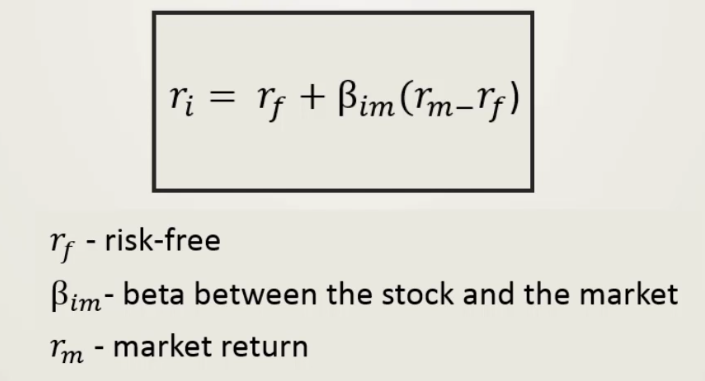

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin

In [2]:
tickers = {
    "P&G" : "PG",
    "S&P500" : "^GSPC"
}
df = pd.DataFrame()
for ticker in tickers.values():
    data = yfin.Ticker(ticker)
    data = data.history(start="2012-1-1", end="2016-1-31")
    data["Date"] = data.index.date
    data.set_index(["Date"], inplace=True)
    df[ticker] = data["Close"]

df.head()

,PG,^GSPC
Date,,
2012-01-03,47.620010,1277.060059
2012-01-04,47.598637,1277.300049
2012-01-05,47.399109,1281.060059
2012-01-06,47.285107,1277.810059
2012-01-09,47.484612,1280.699951


In [3]:
# Securities returns
sec_returns = np.log(df/df.shift(1))
sec_returns

,PG,^GSPC
Date,,
2012-01-03,NaN,NaN
2012-01-04,-0.000449,0.000188
2012-01-05,-0.004201,0.002939
2012-01-06,-0.002408,-0.002540
2012-01-09,0.004210,0.002259
...,...,...
2016-01-25,-0.006614,-0.015762
2016-01-26,0.025184,0.014045
2016-01-27,-0.000127,-0.010923


In [4]:
#Annaul Covariance
annual_cov = sec_returns.cov() * 250
annual_cov

,PG,^GSPC
PG,0.020888,0.010704
^GSPC,0.010704,0.016971


In [5]:
# Covariance btw stock and the market
cov_stock_market = annual_cov.iloc[1, 0]
cov_stock_market

0.010704463485812988

In [6]:
# Variance of the market
# var_market = annual_cov.iloc[1, 1] # or
var_market = sec_returns["^GSPC"].var()*250
var_market

0.01697146270731979

In [7]:
# Beta value for the stock i.e PG and the market i.e S&P500
PG_beta = cov_stock_market / var_market
PG_beta

0.6307331118369753

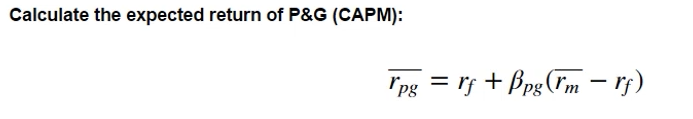

In [13]:
# Risk free return (rf) or US govt bonds return = 2.5 %
risk_free_return = 0.025
# Beta for PG is 0.63(calulated above)
# Equity risk premium for PG is btw 4.5% and 5.5% = 5%
equity_risk_p_PG = 0.05

# Calcuting risk free return for PG
expected_returns_PG = risk_free_return + PG_beta * equity_risk_p_PG
print(f"Expected return for PG is {round(expected_returns_PG * 100, 4)}%")

Expected return for PG is 5.6537%


# Sharp ratio
- Sharp ratio is the measure of the risk adjusted relative returns
- A Sharpe ratio of 1.5 indicates that the investment is generating 1.5 units of excess return for each unit of risk taken, relative to the risk-free rate
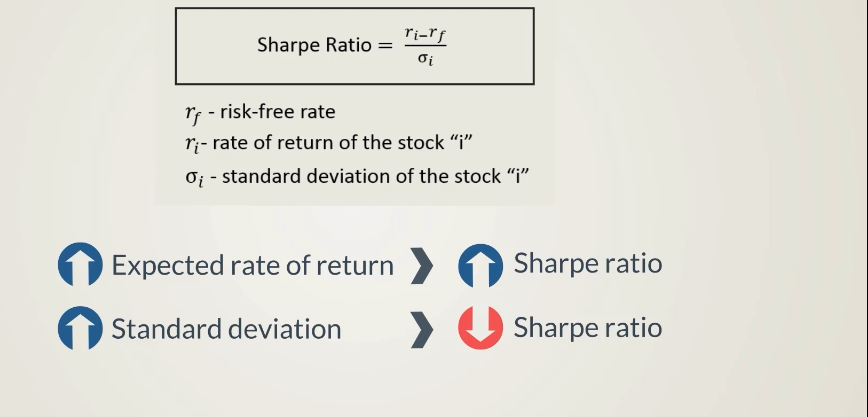

In [14]:
# Calulating sharp of PG
PG_annaul_std = sec_returns["PG"].std() * 250 ** 0.5
sharp_PG = (expected_returns_PG - risk_free_return) / PG_annaul_std
sharp_PG

0.21820412319118915

## Alpha in CAPM
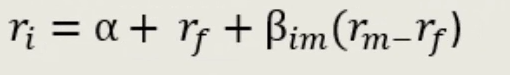
- The standerd CAPM settings assums alpha = 0
- Alpha shows how much returns we get without taking extra risk
- Alpha can be +ve or -ve depending upon actual returns compared to expected returns
- **Passive Trading** - Investing in a market(say S&P500) waiting paitiently 
- **Active Trading** - Adjusting portfolio stocks frequant basis i.e buy / sell stock overperforming / underperforming before market shits back 